Source: https://towardsdatascience.com/understanding-self-organising-map-neural-network-with-python-code-7a77f501e985

In [6]:
import pandas as pd
import numpy as np

In [11]:
pip install matplotlib

450.06s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached matplotlib-3.8.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached contourpy-1.2.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.48.1-cp310-cp310-macosx_10_9_universal2.whl.metadata (158 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.2.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (9.7 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.8.2-cp310-cp310-macosx_11_0_arm64.whl (7.5 MB)
Using cached contourpy-1.2.0-cp310-cp310-macosx_11_0_arm64.whl (242 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.48.1-cp310-cp310-macosx_10_9_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.5-cp310-cp310-macosx_11_0_arm64.whl (66 kB)
Using cached pillow-10.2.0-cp310-cp310-macosx_11_0_arm64.whl (3.3 MB)
Using cached pyparsing-3.1.1-py

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [8]:
import os
import sys

CURRENT_DIR = os.path.abspath(os.path.dirname(__name__))
LIBRARY_DIR = os.path.join(CURRENT_DIR, '.m', '.m')

sys.path.append(LIBRARY_DIR)

In [20]:
print(LIBRARY_DIR)

/Users/meeti/alpha/.m/.m


In [24]:
pip install scipy

3554.73s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.9/112.9 kB 929.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 486.2 kB/s eta 0:00:0000:0100:02

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install scikit-learn

3668.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 502.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 541.8 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

In [10]:
data_file = "data_banknote_authentication.txt"
data_x = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=range(0,4) ,dtype=np.float64)
data_y = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=(4,),dtype=np.int64)

In [11]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(1097, 4) (1097,) (275, 4) (275,)


In [19]:
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  print('xshape', x.shape)
  print('yshape', y.shape)
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_distance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_distance)
  return learning_rate, neighbourhood_range

In [20]:
num_rows = 13
num_cols = 13
max_m_distance = 4
max_learning_rate = 0.5
max_steps = int(2)

In [21]:
#main function

train_x_norm = minmax_scaler(train_x) # normalisation

# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_distance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
yshape (4,)
xshape (4,)
ysha

In [90]:
# collecting labels

label_data = train_y
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

sample data:  1000


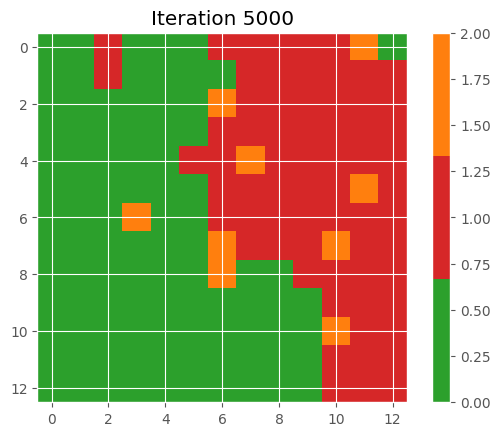

In [91]:
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [92]:
# prediction

# test data

# using the trained som, search the winning node of corresponding to the test data
# get the label of the winning node

data = minmax_scaler(test_x) # normalisation

winner_labels = []

for t in range(data.shape[0]):
 winner = winning_neuron(data, t, som, num_rows, num_cols)
 row = winner[0]
 col = winner[1]
 predicted = label_map[row][col]
 winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(test_y, np.array(winner_labels)))

Accuracy:  0.9454545454545454
